## Produccion hidrocarbiros primer trimestre 2024 Argentina

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


# data
d2024 = pd.read_csv('data\produccin-de-pozos-de-gas-y-petrleo-2024.csv', low_memory=False)

### Exploracion de datos

In [25]:
pd.set_option('display.max_columns', None)
d2024.head()

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data
0,Z001,2024,1,145622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.DJ.x-2,PROS,2402.0,punta rosada,AGR,GENERAL ROCA,AGR,GENERAL ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
1,Z001,2024,1,145624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.GR.x-2,FIMP,2507.0,formación improductiva,AGR,GENERAL ROCA,AGR,GENERAL ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
2,Z001,2024,1,145626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.RN.-2,FIMP,1903.0,formación improductiva,AGR,GENERAL ROCA,AGR,GENERAL ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
3,Z001,2024,1,145625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.GR.x-5,FIMP,2707.0,formación improductiva,AGR,GENERAL ROCA,AGR,GENERAL ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
4,Z001,2024,1,145623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Plunger Lift,Abandonado,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.G.x-1,FIMP,2500.0,formación improductiva,AGR,GENERAL ROCA,AGR,GENERAL ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31


In [26]:
d2024.isna().sum()

idempresa                      0
anio                           0
mes                            0
idpozo                         0
prod_pet                       0
prod_gas                       0
prod_agua                      0
iny_agua                       0
iny_gas                        0
iny_co2                        0
iny_otro                       0
tef                            0
vida_util                 237292
tipoextraccion                10
tipoestado                    10
tipopozo                      10
observaciones             227177
fechaingreso                   0
rectificado                    0
habilitado                     0
idusuario                      0
empresa                        0
sigla                          0
formprod                    8040
profundidad                    0
formacion                   8379
idareapermisoconcesion         0
areapermisoconcesion           0
idareayacimiento               0
areayacimiento                 0
cuenca    

In [27]:
d2024.shape

(242437, 38)

### Limpieza de datos

In [28]:
# Limpieza de df
useful_columns = d2024[['anio','mes','idpozo','prod_pet','prod_gas','prod_agua','iny_agua','iny_gas','iny_co2','iny_otro','tipoextraccion','tipoestado','tipopozo','empresa','profundidad','cuenca','provincia','fecha_data']]
my_dataframe = useful_columns.dropna()
# Elimino estos datos por comodidad al graficar, ya que solo representan el 0.8% del total
my_dataframe = my_dataframe[(my_dataframe['provincia']!='Estado Nacional') & (my_dataframe['provincia']!='Jujuy') & (my_dataframe['provincia']!='Formosa')]
# Sub df para Mes, tipoEstado 
unique_mes = my_dataframe['mes'].unique()
sub_mes = {}
for n in unique_mes:
    sub_mes[n] = my_dataframe.loc[my_dataframe['mes'] == n]

In [29]:
# Seteo de meses
mes1 = sub_mes[1] 
mes2 = sub_mes[2]
mes3 = sub_mes[3]

##### Marzo

In [30]:
# Desglose mes de marzo 
# Activos
pozos_activos = pd.concat([mes3.loc[mes3['tipoestado']=='Extracción Efectiva'], mes3.loc[mes3['tipoestado']=='En Inyección Efectiva']], axis=0, ignore_index=True) 
pozos_reserva = pd.concat([mes3.loc[mes3['tipoestado']=='En Reserva de Gas'], mes3.loc[mes3['tipoestado']=='En Reserva para Recup. Sec./Asist.']], axis=0, ignore_index=True)
pozos_en_estudio = mes3.loc[mes3['tipoestado']=='En Estudio']


### Analisis

##### Cantidad de pozos por provicia

In [31]:
# df para la gracica
data = mes3[['provincia','tipoestado']]
pozos_por_provincia = data.pivot_table(index='provincia', columns='tipoestado', aggfunc='size', fill_value=0)
# instancia figura
fig = go.Figure()
# Añado un barra para cada tipo
for tipoestado in pozos_por_provincia.columns:
    fig.add_trace(go.Bar( 
        x=pozos_por_provincia.index, #provincias 
        y=pozos_por_provincia[tipoestado],
        name=tipoestado
        ))
# Diseño del grafico
fig.update_layout(
    barmode='stack',
    title='Total de pozos por provincia',
    xaxis=dict(title='Provincia'),
    yaxis=dict(title='Cantidad'),
    legend=dict(title='Tipo Estado')
)
# Show
fig.show()

Tabla con los datos presentados en la grafica anterior

In [57]:
sumatoria = pozos_por_provincia.sum(axis=1) 
pozos_por_provincia.insert(0,'Totales', sumatoria)
pozos_por_provincia

tipoestado,Totales,A Abandonar,Abandonado,Abandono Temporario,En Espera de Reparación,En Estudio,En Inyección Efectiva,En Reparación,En Reserva de Gas,En Reserva para Recup. Sec./Asist.,Extracción Efectiva,Mantenimiento de Presión,Otras Situación Activo,Otras Situación Inactivo,Parado Alta Relación Agua/Petróleo,Parado Alta Relación Gas/Petróleo,Parado Transitoriamente
provincia,,,,,,,,,,,,,,,,,
Chubut,20911,583,6103,57,231,1388,2103,14,72,2678,6666,0,42,109,99,49,717
La Pampa,2687,14,280,21,139,155,225,0,3,2,1493,0,0,3,18,3,331
Mendoza,8556,640,1874,39,277,614,913,1,120,409,2778,3,4,36,385,9,454
Neuquén,17799,564,3119,51,657,2405,1067,19,187,948,6503,10,151,148,197,15,1758
Rio Negro,3639,112,1140,28,143,371,265,3,10,80,1052,2,6,51,195,3,178
Salta,894,72,530,3,0,88,11,0,0,0,61,10,0,17,1,1,100
Santa Cruz,23432,739,4771,1181,376,2311,1473,1,118,3469,7399,17,1,417,81,18,1060
Tierra del Fuego,1235,15,412,12,32,111,24,0,47,211,226,0,1,63,2,2,77


#### Total de pozos no abandonados por provincia

In [33]:
# Eliminamos abandonados
total_pozos_no_abandonados = pozos_por_provincia.drop(columns='Abandonado')
# Sumamos los totales de los pozos en cada provincia
totales = total_pozos_no_abandonados.sum(axis=1)

# Presentacion, Instancia de Figure
fig = go.Figure(
    data=[go.Pie(
        labels=totales.index,
        values=totales,
        hoverinfo='label+percent',
        textinfo='value+percent',
        textfont=dict(size=15),
    )]
)
fig.update_layout(
    title='Distribucion de pozos No abandonados por Provincia'
)
fig.show()

In [34]:
# Cuadro de los pozos totales por provincia
total_pozos_no_abandonados.insert(0, 'Totales', totales)
total_pozos_no_abandonados

tipoestado,Totales,A Abandonar,Abandono Temporario,En Espera de Reparación,En Estudio,En Inyección Efectiva,En Reparación,En Reserva de Gas,En Reserva para Recup. Sec./Asist.,Extracción Efectiva,Mantenimiento de Presión,Otras Situación Activo,Otras Situación Inactivo,Parado Alta Relación Agua/Petróleo,Parado Alta Relación Gas/Petróleo,Parado Transitoriamente
provincia,,,,,,,,,,,,,,,,
Chubut,14808,583,57,231,1388,2103,14,72,2678,6666,0,42,109,99,49,717
La Pampa,2407,14,21,139,155,225,0,3,2,1493,0,0,3,18,3,331
Mendoza,6682,640,39,277,614,913,1,120,409,2778,3,4,36,385,9,454
Neuquén,14680,564,51,657,2405,1067,19,187,948,6503,10,151,148,197,15,1758
Rio Negro,2499,112,28,143,371,265,3,10,80,1052,2,6,51,195,3,178
Salta,364,72,3,0,88,11,0,0,0,61,10,0,17,1,1,100
Santa Cruz,18661,739,1181,376,2311,1473,1,118,3469,7399,17,1,417,81,18,1060
Tierra del Fuego,823,15,12,32,111,24,0,47,211,226,0,1,63,2,2,77


Los ***Pozos activos*** por provincia 

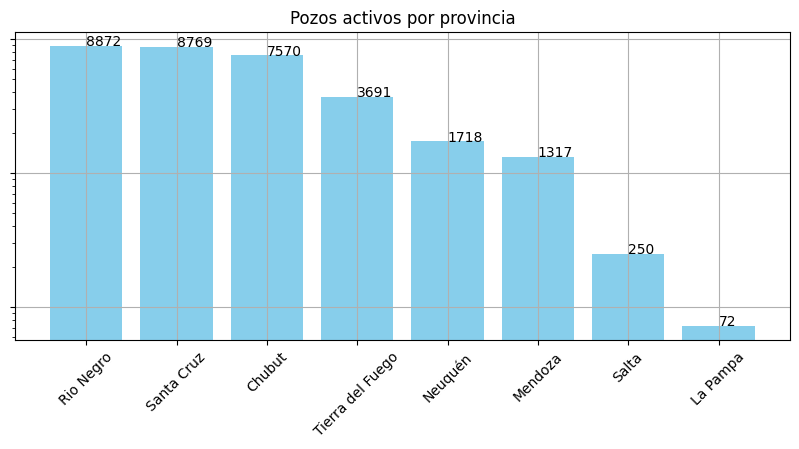

In [35]:
#Cantidad pozos activos por provincia 
from matplotlib.ticker import NullFormatter
# data
x = pozos_activos['provincia'].unique()
y = pozos_activos['provincia'].value_counts()

# Creacion grafico
fig, ax = plt.subplots(figsize=(10,4))
bars = ax.bar(x,y, color='skyblue')
# Grafico logarítmico 
ax.set_yscale('log')
ax.yaxis.set_major_formatter(NullFormatter())
ax.grid()
# agregado del valor entero de cada provincia
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval,int(yval))
# Arreglos
plt.xticks(rotation=45)
plt.title('Pozos activos por provincia')
plt.show()

#### Produccion petroleo, gas, agua por provincia

In [69]:
# # extraccion data  
# activos = mes3[(mes3['tipoestado']=='Extracción Efectiva') | (mes3['tipoestado']=="En Inyección Efectiva")]

# produccion = activos[['provincia','prod_pet','prod_gas','prod_agua']]
# produccion.set_index('provincia', inplace=True)
# produccion.value_counts().plot(kind='bar')

#esto salio terriblemente mal, tengo que pensar como lo mejoro

Inyeccion de agua, co2, gas por provincia

Empresas con mayor produccion

Cuenca con mayor produccion

Extraccion mas frecuente por cuenca